# Leap of Faith in PyTorch [L3] -Autograd and Computational Graphs (Day 3) - Demo

### Basic Tensor Operations (recap from L1)

In [11]:
import torch

# Hypothetical GDP data for the past 10 years (in trillion dollars)
gdp_data = torch.tensor([
    [20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0],  # USA
    [10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0],  # China
    [2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3],            # India
    [1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3],            # Canada
    [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1]             # Russia
], requires_grad=True)

# Years for plotting
years = torch.arange(2011, 2021)

# Normalize GDP data (scaling between 0 and 1)
# gdp_data_normalized = (gdp_data - gdp_data.min()) / (gdp_data.max() - gdp_data.min())

In [12]:
# Initialize parameters (slope and intercept) for each country
import torch.nn.init as init

# Initialize parameters
params = torch.nn.Parameter(torch.empty(5, 1))
intercepts = torch.nn.Parameter(torch.empty(5, 1))

init.normal_(params, mean=0.0, std=0.01)
init.normal_(intercepts, mean=0.0, std=0.01)

# params = torch.tensor([[0.1], [0.1], [0.1], [0.1], [0.1]], requires_grad=True)  # Slope
# intercepts = torch.tensor([[0.1], [0.1], [0.1], [0.1], [0.1]], requires_grad=True)  # Intercept

# Define the linear model
def linear_model(x, params, intercepts):
    return params * x + intercepts

In [13]:
# Mean squared error loss
def mse_loss(predicted, actual):
    return ((predicted - actual) ** 2).mean()

In [16]:
# # Training parameters
# learning_rate = 0.001  # Reduced learning rate

# epochs = 1000

# # Training loop
# for epoch in range(epochs):
#     # Zero the gradients
#     params.grad = None
#     intercepts.grad = None
    
#     # Predict GDP
#     predicted_gdp = linear_model(years, params, intercepts)
    
#     # Compute loss
#     loss = mse_loss(predicted_gdp, gdp_data)
    
#     # Perform backpropagation
#     loss.backward()
    
#     # Update parameters
#     with torch.no_grad():
#         params -= learning_rate * params.grad
#         intercepts -= learning_rate * intercepts.grad
    
#     # Print loss every 100 epochs
#     if epoch % 100 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')

# # Print final parameters
# print("Trained Parameters (slope):", params)
# print("Trained Intercepts:", intercepts)

# Normalize GDP data (scaling between 0 and 1)
gdp_data_normalized = (gdp_data - gdp_data.min()) / (gdp_data.max() - gdp_data.min())

# Training parameters
learning_rate = 0.1  # Reduced learning rate
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Zero the gradients
    params.grad = None
    intercepts.grad = None
    
    # Predict GDP (use normalized data for prediction)
    predicted_gdp = linear_model(years.float(), params, intercepts)
    
    # Compute loss
    loss = mse_loss(predicted_gdp, gdp_data_normalized)
    
    # Perform backpropagation
#     loss.backward()
    loss.backward(retain_graph=True)  # Retain the graph if needed
    
    # Update parameters
    with torch.no_grad():
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Print final parameters
print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)


Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Trained Parameters (slope): Parameter containing:
tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan]], requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan]], requires_grad=True)


In [5]:
# Future years
future_years = torch.tensor([2021, 2022, 2023, 2024])

# Predict future GDP
future_gdp_predictions = linear_model(future_years, params, intercepts)
print("\nPredicted GDP for the next 4 years:\n", future_gdp_predictions)


Predicted GDP for the next 4 years:
 tensor([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]], grad_fn=<AddBackward0>)


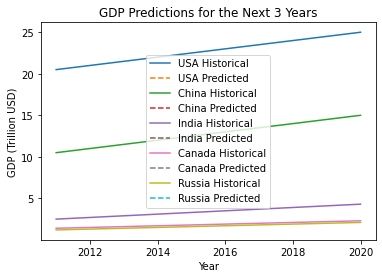

In [6]:
import matplotlib.pyplot as plt

# Plot historical GDP data
for i, country in enumerate(['USA', 'China', 'India', 'Canada', 'Russia']):
    plt.plot(years.numpy(), gdp_data[i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_predictions[i].detach().numpy(), linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP (Trillion USD)')
plt.title('GDP Predictions for the Next 3 Years')
plt.legend()
plt.show()

Epoch 0, Loss: 0.3051905632019043
Epoch 100, Loss: 0.2542439103126526
Epoch 200, Loss: 0.21017958223819733
Epoch 300, Loss: 0.1721072942018509
Epoch 400, Loss: 0.1393057405948639
Epoch 500, Loss: 0.11151222139596939
Epoch 600, Loss: 0.08896788954734802
Epoch 700, Loss: 0.07080207020044327
Epoch 800, Loss: 0.0570390522480011
Epoch 900, Loss: 0.046981796622276306
Trained Parameters (slope): Parameter containing:
tensor([[0.0848, 0.0781, 0.0657, 0.0334, 0.0212]], requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[0.0231, 0.0170, 0.0097, 0.0039, 0.0025]], requires_grad=True)
Future GDP Predictions (Denormalized):
 [[0.8754654  0.8319919  0.7645182  0.6310814  0.58335626]
 [0.90560997 0.85976696 0.78787875 0.64295226 0.59088695]
 [0.93575466 0.88754207 0.81123924 0.6548232  0.5984176 ]]


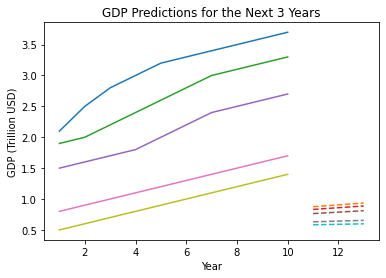

In [33]:
import torch
import matplotlib.pyplot as plt

# Define years and GDP data
years = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=torch.float32).view(-1, 1)
gdp_data = torch.tensor([
    [2.1, 2.5, 2.8, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7],  # USA
    [1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.1, 3.2, 3.3],  # China
    [1.5, 1.6, 1.7, 1.8, 2.0, 2.2, 2.4, 2.5, 2.6, 2.7],  # India
    [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7],  # Canada
    [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]   # Russia
], dtype=torch.float32).t()

# Normalize data
gdp_data_min = gdp_data.min()
gdp_data_max = gdp_data.max()
gdp_data_normalized = (gdp_data - gdp_data_min) / (gdp_data_max - gdp_data_min)

# Initialize model parameters
num_countries = gdp_data.size(1)
params = torch.nn.Parameter(torch.randn(1, num_countries) * 0.01)  # Adjusted for num_countries
intercepts = torch.nn.Parameter(torch.zeros(1, num_countries))

# Define model and loss
def linear_model(x, params, intercepts):
    return x @ params + intercepts

def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

# Training parameters
learning_rate = 0.0001
epochs = 1000

for epoch in range(epochs):
    # Zero gradients
    params.grad = None
    intercepts.grad = None
    
    # Forward pass
    predicted_gdp = linear_model(years, params, intercepts)
    loss = mse_loss(predicted_gdp, gdp_data_normalized)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        params.grad.data.clamp_(-1, 1)
        intercepts.grad.data.clamp_(-1, 1)
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)

# Predict future GDP
future_years = torch.tensor([11, 12, 13], dtype=torch.float32).view(-1, 1)
future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
future_gdp_predictions = linear_model(future_years_normalized, params, intercepts)

# Denormalize predictions
future_gdp_predictions_denorm = future_gdp_predictions * (gdp_data_max - gdp_data_min) + gdp_data_min

# Ensure tensor is correctly shaped
future_gdp_predictions_denorm = future_gdp_predictions_denorm.detach().numpy()
print("Future GDP Predictions (Denormalized):\n", future_gdp_predictions_denorm)

# Plot results
for i, country in enumerate(['USA', 'China', 'India', 'Canada', 'Russia']):
    plt.plot(years.numpy(), gdp_data[:, i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_predictions_denorm[:, i], linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP (Trillion USD)')
plt.title('GDP Predictions for the Next 3 Years')
# plt.legend()
plt.show()


Epoch 0, Loss: 1278.7576904296875
Epoch 100, Loss: 1.1728895902633667
Epoch 200, Loss: 1.152567982673645
Epoch 300, Loss: 1.134149193763733
Epoch 400, Loss: 1.1174736022949219
Epoch 500, Loss: 1.102394461631775
Epoch 600, Loss: 1.0887765884399414
Epoch 700, Loss: 1.0764957666397095
Epoch 800, Loss: 1.0654377937316895
Epoch 900, Loss: 1.0554977655410767
Epoch 1000, Loss: 1.046579122543335
Epoch 1100, Loss: 1.0385934114456177
Epoch 1200, Loss: 1.031459093093872
Epoch 1300, Loss: 1.025101661682129
Epoch 1400, Loss: 1.0194517374038696
Epoch 1500, Loss: 1.0144469738006592
Epoch 1600, Loss: 1.0100294351577759
Epoch 1700, Loss: 1.006145715713501
Epoch 1800, Loss: 1.0027474164962769
Epoch 1900, Loss: 0.9997897744178772
Epoch 2000, Loss: 0.9972317814826965
Epoch 2100, Loss: 0.995036244392395
Epoch 2200, Loss: 0.9931685328483582
Epoch 2300, Loss: 0.9915966391563416
Epoch 2400, Loss: 0.9902929663658142
Epoch 2500, Loss: 0.9892306327819824
Epoch 2600, Loss: 0.9883855581283569
Epoch 2700, Loss: 0.9

Epoch 22300, Loss: 1.0214002132415771
Epoch 22400, Loss: 1.0214014053344727
Epoch 22500, Loss: 1.0214024782180786
Epoch 22600, Loss: 1.0214039087295532
Epoch 22700, Loss: 1.0214049816131592
Epoch 22800, Loss: 1.0214052200317383
Epoch 22900, Loss: 1.021404504776001
Epoch 23000, Loss: 1.0214033126831055
Epoch 23100, Loss: 1.0214022397994995
Epoch 23200, Loss: 1.0214017629623413
Epoch 23300, Loss: 1.0214005708694458
Epoch 23400, Loss: 1.0213992595672607
Epoch 23500, Loss: 1.0213981866836548
Epoch 23600, Loss: 1.0213972330093384
Epoch 23700, Loss: 1.0213972330093384
Epoch 23800, Loss: 1.0213972330093384
Epoch 23900, Loss: 1.0213972330093384
Epoch 24000, Loss: 1.0213972330093384
Epoch 24100, Loss: 1.0213972330093384
Epoch 24200, Loss: 1.0213972330093384
Epoch 24300, Loss: 1.0213972330093384
Epoch 24400, Loss: 1.0213972330093384
Epoch 24500, Loss: 1.0213972330093384
Epoch 24600, Loss: 1.0213972330093384
Epoch 24700, Loss: 1.0213972330093384
Epoch 24800, Loss: 1.0213972330093384
Epoch 24900, 

Epoch 44400, Loss: 1.0213972330093384
Epoch 44500, Loss: 1.0213972330093384
Epoch 44600, Loss: 1.0213972330093384
Epoch 44700, Loss: 1.0213972330093384
Epoch 44800, Loss: 1.0213972330093384
Epoch 44900, Loss: 1.0213972330093384
Epoch 45000, Loss: 1.0213972330093384
Epoch 45100, Loss: 1.0213972330093384
Epoch 45200, Loss: 1.0213972330093384
Epoch 45300, Loss: 1.0213972330093384
Epoch 45400, Loss: 1.0213972330093384
Epoch 45500, Loss: 1.0213972330093384
Epoch 45600, Loss: 1.0213972330093384
Epoch 45700, Loss: 1.0213972330093384
Epoch 45800, Loss: 1.0213972330093384
Epoch 45900, Loss: 1.0213972330093384
Epoch 46000, Loss: 1.0213972330093384
Epoch 46100, Loss: 1.0213972330093384
Epoch 46200, Loss: 1.0213972330093384
Epoch 46300, Loss: 1.0213972330093384
Epoch 46400, Loss: 1.0213972330093384
Epoch 46500, Loss: 1.0213972330093384
Epoch 46600, Loss: 1.0213972330093384
Epoch 46700, Loss: 1.0213972330093384
Epoch 46800, Loss: 1.0213972330093384
Epoch 46900, Loss: 1.0213972330093384
Epoch 47000,

Epoch 67100, Loss: 1.0213972330093384
Epoch 67200, Loss: 1.0213972330093384
Epoch 67300, Loss: 1.0213972330093384
Epoch 67400, Loss: 1.0213972330093384
Epoch 67500, Loss: 1.0213972330093384
Epoch 67600, Loss: 1.0213972330093384
Epoch 67700, Loss: 1.0213972330093384
Epoch 67800, Loss: 1.0213972330093384
Epoch 67900, Loss: 1.0213972330093384
Epoch 68000, Loss: 1.0213972330093384
Epoch 68100, Loss: 1.0213972330093384
Epoch 68200, Loss: 1.0213972330093384
Epoch 68300, Loss: 1.0213972330093384
Epoch 68400, Loss: 1.0213972330093384
Epoch 68500, Loss: 1.0213972330093384
Epoch 68600, Loss: 1.0213972330093384
Epoch 68700, Loss: 1.0213972330093384
Epoch 68800, Loss: 1.0213972330093384
Epoch 68900, Loss: 1.0213972330093384
Epoch 69000, Loss: 1.0213972330093384
Epoch 69100, Loss: 1.0213972330093384
Epoch 69200, Loss: 1.0213972330093384
Epoch 69300, Loss: 1.0213972330093384
Epoch 69400, Loss: 1.0213972330093384
Epoch 69500, Loss: 1.0213972330093384
Epoch 69600, Loss: 1.0213972330093384
Epoch 69700,

Epoch 89700, Loss: 1.0213972330093384
Epoch 89800, Loss: 1.0213972330093384
Epoch 89900, Loss: 1.0213972330093384
Epoch 90000, Loss: 1.0213972330093384
Epoch 90100, Loss: 1.0213972330093384
Epoch 90200, Loss: 1.0213972330093384
Epoch 90300, Loss: 1.0213972330093384
Epoch 90400, Loss: 1.0213972330093384
Epoch 90500, Loss: 1.0213972330093384
Epoch 90600, Loss: 1.0213972330093384
Epoch 90700, Loss: 1.0213972330093384
Epoch 90800, Loss: 1.0213972330093384
Epoch 90900, Loss: 1.0213972330093384
Epoch 91000, Loss: 1.0213972330093384
Epoch 91100, Loss: 1.0213972330093384
Epoch 91200, Loss: 1.0213972330093384
Epoch 91300, Loss: 1.0213972330093384
Epoch 91400, Loss: 1.0213972330093384
Epoch 91500, Loss: 1.0213972330093384
Epoch 91600, Loss: 1.0213972330093384
Epoch 91700, Loss: 1.0213972330093384
Epoch 91800, Loss: 1.0213972330093384
Epoch 91900, Loss: 1.0213972330093384
Epoch 92000, Loss: 1.0213972330093384
Epoch 92100, Loss: 1.0213972330093384
Epoch 92200, Loss: 1.0213972330093384
Epoch 92300,

Epoch 112200, Loss: 1.0213972330093384
Epoch 112300, Loss: 1.0213972330093384
Epoch 112400, Loss: 1.0213972330093384
Epoch 112500, Loss: 1.0213972330093384
Epoch 112600, Loss: 1.0213972330093384
Epoch 112700, Loss: 1.0213972330093384
Epoch 112800, Loss: 1.0213972330093384
Epoch 112900, Loss: 1.0213972330093384
Epoch 113000, Loss: 1.0213972330093384
Epoch 113100, Loss: 1.0213972330093384
Epoch 113200, Loss: 1.0213972330093384
Epoch 113300, Loss: 1.0213972330093384
Epoch 113400, Loss: 1.0213972330093384
Epoch 113500, Loss: 1.0213972330093384
Epoch 113600, Loss: 1.0213972330093384
Epoch 113700, Loss: 1.0213972330093384
Epoch 113800, Loss: 1.0213972330093384
Epoch 113900, Loss: 1.0213972330093384
Epoch 114000, Loss: 1.0213972330093384
Epoch 114100, Loss: 1.0213972330093384
Epoch 114200, Loss: 1.0213972330093384
Epoch 114300, Loss: 1.0213972330093384
Epoch 114400, Loss: 1.0213972330093384
Epoch 114500, Loss: 1.0213972330093384
Epoch 114600, Loss: 1.0213972330093384
Epoch 114700, Loss: 1.021

Epoch 134800, Loss: 1.0213972330093384
Epoch 134900, Loss: 1.0213972330093384
Epoch 135000, Loss: 1.0213972330093384
Epoch 135100, Loss: 1.0213972330093384
Epoch 135200, Loss: 1.0213972330093384
Epoch 135300, Loss: 1.0213972330093384
Epoch 135400, Loss: 1.0213972330093384
Epoch 135500, Loss: 1.0213972330093384
Epoch 135600, Loss: 1.0213972330093384
Epoch 135700, Loss: 1.0213972330093384
Epoch 135800, Loss: 1.0213972330093384
Epoch 135900, Loss: 1.0213972330093384
Epoch 136000, Loss: 1.0213972330093384
Epoch 136100, Loss: 1.0213972330093384
Epoch 136200, Loss: 1.0213972330093384
Epoch 136300, Loss: 1.0213972330093384
Epoch 136400, Loss: 1.0213972330093384
Epoch 136500, Loss: 1.0213972330093384
Epoch 136600, Loss: 1.0213972330093384
Epoch 136700, Loss: 1.0213972330093384
Epoch 136800, Loss: 1.0213972330093384
Epoch 136900, Loss: 1.0213972330093384
Epoch 137000, Loss: 1.0213972330093384
Epoch 137100, Loss: 1.0213972330093384
Epoch 137200, Loss: 1.0213972330093384
Epoch 137300, Loss: 1.021

Epoch 157300, Loss: 1.0213972330093384
Epoch 157400, Loss: 1.0213972330093384
Epoch 157500, Loss: 1.0213972330093384
Epoch 157600, Loss: 1.0213972330093384
Epoch 157700, Loss: 1.0213972330093384
Epoch 157800, Loss: 1.0213972330093384
Epoch 157900, Loss: 1.0213972330093384
Epoch 158000, Loss: 1.0213972330093384
Epoch 158100, Loss: 1.0213972330093384
Epoch 158200, Loss: 1.0213972330093384
Epoch 158300, Loss: 1.0213972330093384
Epoch 158400, Loss: 1.0213972330093384
Epoch 158500, Loss: 1.0213972330093384
Epoch 158600, Loss: 1.0213972330093384
Epoch 158700, Loss: 1.0213972330093384
Epoch 158800, Loss: 1.0213972330093384
Epoch 158900, Loss: 1.0213972330093384
Epoch 159000, Loss: 1.0213972330093384
Epoch 159100, Loss: 1.0213972330093384
Epoch 159200, Loss: 1.0213972330093384
Epoch 159300, Loss: 1.0213972330093384
Epoch 159400, Loss: 1.0213972330093384
Epoch 159500, Loss: 1.0213972330093384
Epoch 159600, Loss: 1.0213972330093384
Epoch 159700, Loss: 1.0213972330093384
Epoch 159800, Loss: 1.021

Epoch 179400, Loss: 1.0213972330093384
Epoch 179500, Loss: 1.0213972330093384
Epoch 179600, Loss: 1.0213972330093384
Epoch 179700, Loss: 1.0213972330093384
Epoch 179800, Loss: 1.0213972330093384
Epoch 179900, Loss: 1.0213972330093384
Epoch 180000, Loss: 1.0213972330093384
Epoch 180100, Loss: 1.0213972330093384
Epoch 180200, Loss: 1.0213972330093384
Epoch 180300, Loss: 1.0213972330093384
Epoch 180400, Loss: 1.0213972330093384
Epoch 180500, Loss: 1.0213972330093384
Epoch 180600, Loss: 1.0213972330093384
Epoch 180700, Loss: 1.0213972330093384
Epoch 180800, Loss: 1.0213972330093384
Epoch 180900, Loss: 1.0213972330093384
Epoch 181000, Loss: 1.0213972330093384
Epoch 181100, Loss: 1.0213972330093384
Epoch 181200, Loss: 1.0213972330093384
Epoch 181300, Loss: 1.0213972330093384
Epoch 181400, Loss: 1.0213972330093384
Epoch 181500, Loss: 1.0213972330093384
Epoch 181600, Loss: 1.0213972330093384
Epoch 181700, Loss: 1.0213972330093384
Epoch 181800, Loss: 1.0213972330093384
Epoch 181900, Loss: 1.021

Epoch 201800, Loss: 1.0213972330093384
Epoch 201900, Loss: 1.0213972330093384
Epoch 202000, Loss: 1.0213972330093384
Epoch 202100, Loss: 1.0213972330093384
Epoch 202200, Loss: 1.0213972330093384
Epoch 202300, Loss: 1.0213972330093384
Epoch 202400, Loss: 1.0213972330093384
Epoch 202500, Loss: 1.0213972330093384
Epoch 202600, Loss: 1.0213972330093384
Epoch 202700, Loss: 1.0213972330093384
Epoch 202800, Loss: 1.0213972330093384
Epoch 202900, Loss: 1.0213972330093384
Epoch 203000, Loss: 1.0213972330093384
Epoch 203100, Loss: 1.0213972330093384
Epoch 203200, Loss: 1.0213972330093384
Epoch 203300, Loss: 1.0213972330093384
Epoch 203400, Loss: 1.0213972330093384
Epoch 203500, Loss: 1.0213972330093384
Epoch 203600, Loss: 1.0213972330093384
Epoch 203700, Loss: 1.0213972330093384
Epoch 203800, Loss: 1.0213972330093384
Epoch 203900, Loss: 1.0213972330093384
Epoch 204000, Loss: 1.0213972330093384
Epoch 204100, Loss: 1.0213972330093384
Epoch 204200, Loss: 1.0213972330093384
Epoch 204300, Loss: 1.021

Epoch 223000, Loss: 1.0213972330093384
Epoch 223100, Loss: 1.0213972330093384
Epoch 223200, Loss: 1.0213972330093384
Epoch 223300, Loss: 1.0213972330093384
Epoch 223400, Loss: 1.0213972330093384
Epoch 223500, Loss: 1.0213972330093384
Epoch 223600, Loss: 1.0213972330093384
Epoch 223700, Loss: 1.0213972330093384
Epoch 223800, Loss: 1.0213972330093384
Epoch 223900, Loss: 1.0213972330093384
Epoch 224000, Loss: 1.0213972330093384
Epoch 224100, Loss: 1.0213972330093384
Epoch 224200, Loss: 1.0213972330093384
Epoch 224300, Loss: 1.0213972330093384
Epoch 224400, Loss: 1.0213972330093384
Epoch 224500, Loss: 1.0213972330093384
Epoch 224600, Loss: 1.0213972330093384
Epoch 224700, Loss: 1.0213972330093384
Epoch 224800, Loss: 1.0213972330093384
Epoch 224900, Loss: 1.0213972330093384
Epoch 225000, Loss: 1.0213972330093384
Epoch 225100, Loss: 1.0213972330093384
Epoch 225200, Loss: 1.0213972330093384
Epoch 225300, Loss: 1.0213972330093384
Epoch 225400, Loss: 1.0213972330093384
Epoch 225500, Loss: 1.021

Epoch 244900, Loss: 1.0213972330093384
Epoch 245000, Loss: 1.0213972330093384
Epoch 245100, Loss: 1.0213972330093384
Epoch 245200, Loss: 1.0213972330093384
Epoch 245300, Loss: 1.0213972330093384
Epoch 245400, Loss: 1.0213972330093384
Epoch 245500, Loss: 1.0213972330093384
Epoch 245600, Loss: 1.0213972330093384
Epoch 245700, Loss: 1.0213972330093384
Epoch 245800, Loss: 1.0213972330093384
Epoch 245900, Loss: 1.0213972330093384
Epoch 246000, Loss: 1.0213972330093384
Epoch 246100, Loss: 1.0213972330093384
Epoch 246200, Loss: 1.0213972330093384
Epoch 246300, Loss: 1.0213972330093384
Epoch 246400, Loss: 1.0213972330093384
Epoch 246500, Loss: 1.0213972330093384
Epoch 246600, Loss: 1.0213972330093384
Epoch 246700, Loss: 1.0213972330093384
Epoch 246800, Loss: 1.0213972330093384
Epoch 246900, Loss: 1.0213972330093384
Epoch 247000, Loss: 1.0213972330093384
Epoch 247100, Loss: 1.0213972330093384
Epoch 247200, Loss: 1.0213972330093384
Epoch 247300, Loss: 1.0213972330093384
Epoch 247400, Loss: 1.021

Epoch 266900, Loss: 1.0213972330093384
Epoch 267000, Loss: 1.0213972330093384
Epoch 267100, Loss: 1.0213972330093384
Epoch 267200, Loss: 1.0213972330093384
Epoch 267300, Loss: 1.0213972330093384
Epoch 267400, Loss: 1.0213972330093384
Epoch 267500, Loss: 1.0213972330093384
Epoch 267600, Loss: 1.0213972330093384
Epoch 267700, Loss: 1.0213972330093384
Epoch 267800, Loss: 1.0213972330093384
Epoch 267900, Loss: 1.0213972330093384
Epoch 268000, Loss: 1.0213972330093384
Epoch 268100, Loss: 1.0213972330093384
Epoch 268200, Loss: 1.0213972330093384
Epoch 268300, Loss: 1.0213972330093384
Epoch 268400, Loss: 1.0213972330093384
Epoch 268500, Loss: 1.0213972330093384
Epoch 268600, Loss: 1.0213972330093384
Epoch 268700, Loss: 1.0213972330093384
Epoch 268800, Loss: 1.0213972330093384
Epoch 268900, Loss: 1.0213972330093384
Epoch 269000, Loss: 1.0213972330093384
Epoch 269100, Loss: 1.0213972330093384
Epoch 269200, Loss: 1.0213972330093384
Epoch 269300, Loss: 1.0213972330093384
Epoch 269400, Loss: 1.021

Epoch 288800, Loss: 1.0213972330093384
Epoch 288900, Loss: 1.0213972330093384
Epoch 289000, Loss: 1.0213972330093384
Epoch 289100, Loss: 1.0213972330093384
Epoch 289200, Loss: 1.0213972330093384
Epoch 289300, Loss: 1.0213972330093384
Epoch 289400, Loss: 1.0213972330093384
Epoch 289500, Loss: 1.0213972330093384
Epoch 289600, Loss: 1.0213972330093384
Epoch 289700, Loss: 1.0213972330093384
Epoch 289800, Loss: 1.0213972330093384
Epoch 289900, Loss: 1.0213972330093384
Epoch 290000, Loss: 1.0213972330093384
Epoch 290100, Loss: 1.0213972330093384
Epoch 290200, Loss: 1.0213972330093384
Epoch 290300, Loss: 1.0213972330093384
Epoch 290400, Loss: 1.0213972330093384
Epoch 290500, Loss: 1.0213972330093384
Epoch 290600, Loss: 1.0213972330093384
Epoch 290700, Loss: 1.0213972330093384
Epoch 290800, Loss: 1.0213972330093384
Epoch 290900, Loss: 1.0213972330093384
Epoch 291000, Loss: 1.0213972330093384
Epoch 291100, Loss: 1.0213972330093384
Epoch 291200, Loss: 1.0213972330093384
Epoch 291300, Loss: 1.021

Epoch 311000, Loss: 1.0213972330093384
Epoch 311100, Loss: 1.0213972330093384
Epoch 311200, Loss: 1.0213972330093384
Epoch 311300, Loss: 1.0213972330093384
Epoch 311400, Loss: 1.0213972330093384
Epoch 311500, Loss: 1.0213972330093384
Epoch 311600, Loss: 1.0213972330093384
Epoch 311700, Loss: 1.0213972330093384
Epoch 311800, Loss: 1.0213972330093384
Epoch 311900, Loss: 1.0213972330093384
Epoch 312000, Loss: 1.0213972330093384
Epoch 312100, Loss: 1.0213972330093384
Epoch 312200, Loss: 1.0213972330093384
Epoch 312300, Loss: 1.0213972330093384
Epoch 312400, Loss: 1.0213972330093384
Epoch 312500, Loss: 1.0213972330093384
Epoch 312600, Loss: 1.0213972330093384
Epoch 312700, Loss: 1.0213972330093384
Epoch 312800, Loss: 1.0213972330093384
Epoch 312900, Loss: 1.0213972330093384
Epoch 313000, Loss: 1.0213972330093384
Epoch 313100, Loss: 1.0213972330093384
Epoch 313200, Loss: 1.0213972330093384
Epoch 313300, Loss: 1.0213972330093384
Epoch 313400, Loss: 1.0213972330093384
Epoch 313500, Loss: 1.021

Epoch 333000, Loss: 1.0213972330093384
Epoch 333100, Loss: 1.0213972330093384
Epoch 333200, Loss: 1.0213972330093384
Epoch 333300, Loss: 1.0213972330093384
Epoch 333400, Loss: 1.0213972330093384
Epoch 333500, Loss: 1.0213972330093384
Epoch 333600, Loss: 1.0213972330093384
Epoch 333700, Loss: 1.0213972330093384
Epoch 333800, Loss: 1.0213972330093384
Epoch 333900, Loss: 1.0213972330093384
Epoch 334000, Loss: 1.0213972330093384
Epoch 334100, Loss: 1.0213972330093384
Epoch 334200, Loss: 1.0213972330093384
Epoch 334300, Loss: 1.0213972330093384
Epoch 334400, Loss: 1.0213972330093384
Epoch 334500, Loss: 1.0213972330093384
Epoch 334600, Loss: 1.0213972330093384
Epoch 334700, Loss: 1.0213972330093384
Epoch 334800, Loss: 1.0213972330093384
Epoch 334900, Loss: 1.0213972330093384
Epoch 335000, Loss: 1.0213972330093384
Epoch 335100, Loss: 1.0213972330093384
Epoch 335200, Loss: 1.0213972330093384
Epoch 335300, Loss: 1.0213972330093384
Epoch 335400, Loss: 1.0213972330093384
Epoch 335500, Loss: 1.021

Epoch 355200, Loss: 1.0213972330093384
Epoch 355300, Loss: 1.0213972330093384
Epoch 355400, Loss: 1.0213972330093384
Epoch 355500, Loss: 1.0213972330093384
Epoch 355600, Loss: 1.0213972330093384
Epoch 355700, Loss: 1.0213972330093384
Epoch 355800, Loss: 1.0213972330093384
Epoch 355900, Loss: 1.0213972330093384
Epoch 356000, Loss: 1.0213972330093384
Epoch 356100, Loss: 1.0213972330093384
Epoch 356200, Loss: 1.0213972330093384
Epoch 356300, Loss: 1.0213972330093384
Epoch 356400, Loss: 1.0213972330093384
Epoch 356500, Loss: 1.0213972330093384
Epoch 356600, Loss: 1.0213972330093384
Epoch 356700, Loss: 1.0213972330093384
Epoch 356800, Loss: 1.0213972330093384
Epoch 356900, Loss: 1.0213972330093384
Epoch 357000, Loss: 1.0213972330093384
Epoch 357100, Loss: 1.0213972330093384
Epoch 357200, Loss: 1.0213972330093384
Epoch 357300, Loss: 1.0213972330093384
Epoch 357400, Loss: 1.0213972330093384
Epoch 357500, Loss: 1.0213972330093384
Epoch 357600, Loss: 1.0213972330093384
Epoch 357700, Loss: 1.021

Epoch 376900, Loss: 1.0213972330093384
Epoch 377000, Loss: 1.0213972330093384
Epoch 377100, Loss: 1.0213972330093384
Epoch 377200, Loss: 1.0213972330093384
Epoch 377300, Loss: 1.0213972330093384
Epoch 377400, Loss: 1.0213972330093384
Epoch 377500, Loss: 1.0213972330093384
Epoch 377600, Loss: 1.0213972330093384
Epoch 377700, Loss: 1.0213972330093384
Epoch 377800, Loss: 1.0213972330093384
Epoch 377900, Loss: 1.0213972330093384
Epoch 378000, Loss: 1.0213972330093384
Epoch 378100, Loss: 1.0213972330093384
Epoch 378200, Loss: 1.0213972330093384
Epoch 378300, Loss: 1.0213972330093384
Epoch 378400, Loss: 1.0213972330093384
Epoch 378500, Loss: 1.0213972330093384
Epoch 378600, Loss: 1.0213972330093384
Epoch 378700, Loss: 1.0213972330093384
Epoch 378800, Loss: 1.0213972330093384
Epoch 378900, Loss: 1.0213972330093384
Epoch 379000, Loss: 1.0213972330093384
Epoch 379100, Loss: 1.0213972330093384
Epoch 379200, Loss: 1.0213972330093384
Epoch 379300, Loss: 1.0213972330093384
Epoch 379400, Loss: 1.021

Epoch 399100, Loss: 1.0213972330093384
Epoch 399200, Loss: 1.0213972330093384
Epoch 399300, Loss: 1.0213972330093384
Epoch 399400, Loss: 1.0213972330093384
Epoch 399500, Loss: 1.0213972330093384
Epoch 399600, Loss: 1.0213972330093384
Epoch 399700, Loss: 1.0213972330093384
Epoch 399800, Loss: 1.0213972330093384
Epoch 399900, Loss: 1.0213972330093384
Epoch 400000, Loss: 1.0213972330093384
Epoch 400100, Loss: 1.0213972330093384
Epoch 400200, Loss: 1.0213972330093384
Epoch 400300, Loss: 1.0213972330093384
Epoch 400400, Loss: 1.0213972330093384
Epoch 400500, Loss: 1.0213972330093384
Epoch 400600, Loss: 1.0213972330093384
Epoch 400700, Loss: 1.0213972330093384
Epoch 400800, Loss: 1.0213972330093384
Epoch 400900, Loss: 1.0213972330093384
Epoch 401000, Loss: 1.0213972330093384
Epoch 401100, Loss: 1.0213972330093384
Epoch 401200, Loss: 1.0213972330093384
Epoch 401300, Loss: 1.0213972330093384
Epoch 401400, Loss: 1.0213972330093384
Epoch 401500, Loss: 1.0213972330093384
Epoch 401600, Loss: 1.021

Epoch 421200, Loss: 1.0213972330093384
Epoch 421300, Loss: 1.0213972330093384
Epoch 421400, Loss: 1.0213972330093384
Epoch 421500, Loss: 1.0213972330093384
Epoch 421600, Loss: 1.0213972330093384
Epoch 421700, Loss: 1.0213972330093384
Epoch 421800, Loss: 1.0213972330093384
Epoch 421900, Loss: 1.0213972330093384
Epoch 422000, Loss: 1.0213972330093384
Epoch 422100, Loss: 1.0213972330093384
Epoch 422200, Loss: 1.0213972330093384
Epoch 422300, Loss: 1.0213972330093384
Epoch 422400, Loss: 1.0213972330093384
Epoch 422500, Loss: 1.0213972330093384
Epoch 422600, Loss: 1.0213972330093384
Epoch 422700, Loss: 1.0213972330093384
Epoch 422800, Loss: 1.0213972330093384
Epoch 422900, Loss: 1.0213972330093384
Epoch 423000, Loss: 1.0213972330093384
Epoch 423100, Loss: 1.0213972330093384
Epoch 423200, Loss: 1.0213972330093384
Epoch 423300, Loss: 1.0213972330093384
Epoch 423400, Loss: 1.0213972330093384
Epoch 423500, Loss: 1.0213972330093384
Epoch 423600, Loss: 1.0213972330093384
Epoch 423700, Loss: 1.021

Epoch 443400, Loss: 1.0213972330093384
Epoch 443500, Loss: 1.0213972330093384
Epoch 443600, Loss: 1.0213972330093384
Epoch 443700, Loss: 1.0213972330093384
Epoch 443800, Loss: 1.0213972330093384
Epoch 443900, Loss: 1.0213972330093384
Epoch 444000, Loss: 1.0213972330093384
Epoch 444100, Loss: 1.0213972330093384
Epoch 444200, Loss: 1.0213972330093384
Epoch 444300, Loss: 1.0213972330093384
Epoch 444400, Loss: 1.0213972330093384
Epoch 444500, Loss: 1.0213972330093384
Epoch 444600, Loss: 1.0213972330093384
Epoch 444700, Loss: 1.0213972330093384
Epoch 444800, Loss: 1.0213972330093384
Epoch 444900, Loss: 1.0213972330093384
Epoch 445000, Loss: 1.0213972330093384
Epoch 445100, Loss: 1.0213972330093384
Epoch 445200, Loss: 1.0213972330093384
Epoch 445300, Loss: 1.0213972330093384
Epoch 445400, Loss: 1.0213972330093384
Epoch 445500, Loss: 1.0213972330093384
Epoch 445600, Loss: 1.0213972330093384
Epoch 445700, Loss: 1.0213972330093384
Epoch 445800, Loss: 1.0213972330093384
Epoch 445900, Loss: 1.021

Epoch 465500, Loss: 1.0213972330093384
Epoch 465600, Loss: 1.0213972330093384
Epoch 465700, Loss: 1.0213972330093384
Epoch 465800, Loss: 1.0213972330093384
Epoch 465900, Loss: 1.0213972330093384
Epoch 466000, Loss: 1.0213972330093384
Epoch 466100, Loss: 1.0213972330093384
Epoch 466200, Loss: 1.0213972330093384
Epoch 466300, Loss: 1.0213972330093384
Epoch 466400, Loss: 1.0213972330093384
Epoch 466500, Loss: 1.0213972330093384
Epoch 466600, Loss: 1.0213972330093384
Epoch 466700, Loss: 1.0213972330093384
Epoch 466800, Loss: 1.0213972330093384
Epoch 466900, Loss: 1.0213972330093384
Epoch 467000, Loss: 1.0213972330093384
Epoch 467100, Loss: 1.0213972330093384
Epoch 467200, Loss: 1.0213972330093384
Epoch 467300, Loss: 1.0213972330093384
Epoch 467400, Loss: 1.0213972330093384
Epoch 467500, Loss: 1.0213972330093384
Epoch 467600, Loss: 1.0213972330093384
Epoch 467700, Loss: 1.0213972330093384
Epoch 467800, Loss: 1.0213972330093384
Epoch 467900, Loss: 1.0213972330093384
Epoch 468000, Loss: 1.021

Epoch 487800, Loss: 1.0213972330093384
Epoch 487900, Loss: 1.0213972330093384
Epoch 488000, Loss: 1.0213972330093384
Epoch 488100, Loss: 1.0213972330093384
Epoch 488200, Loss: 1.0213972330093384
Epoch 488300, Loss: 1.0213972330093384
Epoch 488400, Loss: 1.0213972330093384
Epoch 488500, Loss: 1.0213972330093384
Epoch 488600, Loss: 1.0213972330093384
Epoch 488700, Loss: 1.0213972330093384
Epoch 488800, Loss: 1.0213972330093384
Epoch 488900, Loss: 1.0213972330093384
Epoch 489000, Loss: 1.0213972330093384
Epoch 489100, Loss: 1.0213972330093384
Epoch 489200, Loss: 1.0213972330093384
Epoch 489300, Loss: 1.0213972330093384
Epoch 489400, Loss: 1.0213972330093384
Epoch 489500, Loss: 1.0213972330093384
Epoch 489600, Loss: 1.0213972330093384
Epoch 489700, Loss: 1.0213972330093384
Epoch 489800, Loss: 1.0213972330093384
Epoch 489900, Loss: 1.0213972330093384
Epoch 490000, Loss: 1.0213972330093384
Epoch 490100, Loss: 1.0213972330093384
Epoch 490200, Loss: 1.0213972330093384
Epoch 490300, Loss: 1.021

Epoch 510300, Loss: 1.0213972330093384
Epoch 510400, Loss: 1.0213972330093384
Epoch 510500, Loss: 1.0213972330093384
Epoch 510600, Loss: 1.0213972330093384
Epoch 510700, Loss: 1.0213972330093384
Epoch 510800, Loss: 1.0213972330093384
Epoch 510900, Loss: 1.0213972330093384
Epoch 511000, Loss: 1.0213972330093384
Epoch 511100, Loss: 1.0213972330093384
Epoch 511200, Loss: 1.0213972330093384
Epoch 511300, Loss: 1.0213972330093384
Epoch 511400, Loss: 1.0213972330093384
Epoch 511500, Loss: 1.0213972330093384
Epoch 511600, Loss: 1.0213972330093384
Epoch 511700, Loss: 1.0213972330093384
Epoch 511800, Loss: 1.0213972330093384
Epoch 511900, Loss: 1.0213972330093384
Epoch 512000, Loss: 1.0213972330093384
Epoch 512100, Loss: 1.0213972330093384
Epoch 512200, Loss: 1.0213972330093384
Epoch 512300, Loss: 1.0213972330093384
Epoch 512400, Loss: 1.0213972330093384
Epoch 512500, Loss: 1.0213972330093384
Epoch 512600, Loss: 1.0213972330093384
Epoch 512700, Loss: 1.0213972330093384
Epoch 512800, Loss: 1.021

Epoch 532800, Loss: 1.0213972330093384
Epoch 532900, Loss: 1.0213972330093384
Epoch 533000, Loss: 1.0213972330093384
Epoch 533100, Loss: 1.0213972330093384
Epoch 533200, Loss: 1.0213972330093384
Epoch 533300, Loss: 1.0213972330093384
Epoch 533400, Loss: 1.0213972330093384
Epoch 533500, Loss: 1.0213972330093384
Epoch 533600, Loss: 1.0213972330093384
Epoch 533700, Loss: 1.0213972330093384
Epoch 533800, Loss: 1.0213972330093384
Epoch 533900, Loss: 1.0213972330093384
Epoch 534000, Loss: 1.0213972330093384
Epoch 534100, Loss: 1.0213972330093384
Epoch 534200, Loss: 1.0213972330093384
Epoch 534300, Loss: 1.0213972330093384
Epoch 534400, Loss: 1.0213972330093384
Epoch 534500, Loss: 1.0213972330093384
Epoch 534600, Loss: 1.0213972330093384
Epoch 534700, Loss: 1.0213972330093384
Epoch 534800, Loss: 1.0213972330093384
Epoch 534900, Loss: 1.0213972330093384
Epoch 535000, Loss: 1.0213972330093384
Epoch 535100, Loss: 1.0213972330093384
Epoch 535200, Loss: 1.0213972330093384
Epoch 535300, Loss: 1.021

Epoch 555000, Loss: 1.0213972330093384
Epoch 555100, Loss: 1.0213972330093384
Epoch 555200, Loss: 1.0213972330093384
Epoch 555300, Loss: 1.0213972330093384
Epoch 555400, Loss: 1.0213972330093384
Epoch 555500, Loss: 1.0213972330093384
Epoch 555600, Loss: 1.0213972330093384
Epoch 555700, Loss: 1.0213972330093384
Epoch 555800, Loss: 1.0213972330093384
Epoch 555900, Loss: 1.0213972330093384
Epoch 556000, Loss: 1.0213972330093384
Epoch 556100, Loss: 1.0213972330093384
Epoch 556200, Loss: 1.0213972330093384
Epoch 556300, Loss: 1.0213972330093384
Epoch 556400, Loss: 1.0213972330093384
Epoch 556500, Loss: 1.0213972330093384
Epoch 556600, Loss: 1.0213972330093384
Epoch 556700, Loss: 1.0213972330093384
Epoch 556800, Loss: 1.0213972330093384
Epoch 556900, Loss: 1.0213972330093384
Epoch 557000, Loss: 1.0213972330093384
Epoch 557100, Loss: 1.0213972330093384
Epoch 557200, Loss: 1.0213972330093384
Epoch 557300, Loss: 1.0213972330093384
Epoch 557400, Loss: 1.0213972330093384
Epoch 557500, Loss: 1.021

Epoch 577200, Loss: 1.0213972330093384
Epoch 577300, Loss: 1.0213972330093384
Epoch 577400, Loss: 1.0213972330093384
Epoch 577500, Loss: 1.0213972330093384
Epoch 577600, Loss: 1.0213972330093384
Epoch 577700, Loss: 1.0213972330093384
Epoch 577800, Loss: 1.0213972330093384
Epoch 577900, Loss: 1.0213972330093384
Epoch 578000, Loss: 1.0213972330093384
Epoch 578100, Loss: 1.0213972330093384
Epoch 578200, Loss: 1.0213972330093384
Epoch 578300, Loss: 1.0213972330093384
Epoch 578400, Loss: 1.0213972330093384
Epoch 578500, Loss: 1.0213972330093384
Epoch 578600, Loss: 1.0213972330093384
Epoch 578700, Loss: 1.0213972330093384
Epoch 578800, Loss: 1.0213972330093384
Epoch 578900, Loss: 1.0213972330093384
Epoch 579000, Loss: 1.0213972330093384
Epoch 579100, Loss: 1.0213972330093384
Epoch 579200, Loss: 1.0213972330093384
Epoch 579300, Loss: 1.0213972330093384
Epoch 579400, Loss: 1.0213972330093384
Epoch 579500, Loss: 1.0213972330093384
Epoch 579600, Loss: 1.0213972330093384
Epoch 579700, Loss: 1.021

Epoch 599100, Loss: 1.0213972330093384
Epoch 599200, Loss: 1.0213972330093384
Epoch 599300, Loss: 1.0213972330093384
Epoch 599400, Loss: 1.0213972330093384
Epoch 599500, Loss: 1.0213972330093384
Epoch 599600, Loss: 1.0213972330093384
Epoch 599700, Loss: 1.0213972330093384
Epoch 599800, Loss: 1.0213972330093384
Epoch 599900, Loss: 1.0213972330093384
Epoch 600000, Loss: 1.0213972330093384
Epoch 600100, Loss: 1.0213972330093384
Epoch 600200, Loss: 1.0213972330093384
Epoch 600300, Loss: 1.0213972330093384
Epoch 600400, Loss: 1.0213972330093384
Epoch 600500, Loss: 1.0213972330093384
Epoch 600600, Loss: 1.0213972330093384
Epoch 600700, Loss: 1.0213972330093384
Epoch 600800, Loss: 1.0213972330093384
Epoch 600900, Loss: 1.0213972330093384
Epoch 601000, Loss: 1.0213972330093384
Epoch 601100, Loss: 1.0213972330093384
Epoch 601200, Loss: 1.0213972330093384
Epoch 601300, Loss: 1.0213972330093384
Epoch 601400, Loss: 1.0213972330093384
Epoch 601500, Loss: 1.0213972330093384
Epoch 601600, Loss: 1.021

Epoch 621300, Loss: 1.0213972330093384
Epoch 621400, Loss: 1.0213972330093384
Epoch 621500, Loss: 1.0213972330093384
Epoch 621600, Loss: 1.0213972330093384
Epoch 621700, Loss: 1.0213972330093384
Epoch 621800, Loss: 1.0213972330093384
Epoch 621900, Loss: 1.0213972330093384
Epoch 622000, Loss: 1.0213972330093384
Epoch 622100, Loss: 1.0213972330093384
Epoch 622200, Loss: 1.0213972330093384
Epoch 622300, Loss: 1.0213972330093384
Epoch 622400, Loss: 1.0213972330093384
Epoch 622500, Loss: 1.0213972330093384
Epoch 622600, Loss: 1.0213972330093384
Epoch 622700, Loss: 1.0213972330093384
Epoch 622800, Loss: 1.0213972330093384
Epoch 622900, Loss: 1.0213972330093384
Epoch 623000, Loss: 1.0213972330093384
Epoch 623100, Loss: 1.0213972330093384
Epoch 623200, Loss: 1.0213972330093384
Epoch 623300, Loss: 1.0213972330093384
Epoch 623400, Loss: 1.0213972330093384
Epoch 623500, Loss: 1.0213972330093384
Epoch 623600, Loss: 1.0213972330093384
Epoch 623700, Loss: 1.0213972330093384
Epoch 623800, Loss: 1.021

Epoch 643700, Loss: 1.0213972330093384
Epoch 643800, Loss: 1.0213972330093384
Epoch 643900, Loss: 1.0213972330093384
Epoch 644000, Loss: 1.0213972330093384
Epoch 644100, Loss: 1.0213972330093384
Epoch 644200, Loss: 1.0213972330093384
Epoch 644300, Loss: 1.0213972330093384
Epoch 644400, Loss: 1.0213972330093384
Epoch 644500, Loss: 1.0213972330093384
Epoch 644600, Loss: 1.0213972330093384
Epoch 644700, Loss: 1.0213972330093384
Epoch 644800, Loss: 1.0213972330093384
Epoch 644900, Loss: 1.0213972330093384
Epoch 645000, Loss: 1.0213972330093384
Epoch 645100, Loss: 1.0213972330093384
Epoch 645200, Loss: 1.0213972330093384
Epoch 645300, Loss: 1.0213972330093384
Epoch 645400, Loss: 1.0213972330093384
Epoch 645500, Loss: 1.0213972330093384
Epoch 645600, Loss: 1.0213972330093384
Epoch 645700, Loss: 1.0213972330093384
Epoch 645800, Loss: 1.0213972330093384
Epoch 645900, Loss: 1.0213972330093384
Epoch 646000, Loss: 1.0213972330093384
Epoch 646100, Loss: 1.0213972330093384
Epoch 646200, Loss: 1.021

Epoch 666000, Loss: 1.0213972330093384
Epoch 666100, Loss: 1.0213972330093384
Epoch 666200, Loss: 1.0213972330093384
Epoch 666300, Loss: 1.0213972330093384
Epoch 666400, Loss: 1.0213972330093384
Epoch 666500, Loss: 1.0213972330093384
Epoch 666600, Loss: 1.0213972330093384
Epoch 666700, Loss: 1.0213972330093384
Epoch 666800, Loss: 1.0213972330093384
Epoch 666900, Loss: 1.0213972330093384
Epoch 667000, Loss: 1.0213972330093384
Epoch 667100, Loss: 1.0213972330093384
Epoch 667200, Loss: 1.0213972330093384
Epoch 667300, Loss: 1.0213972330093384
Epoch 667400, Loss: 1.0213972330093384
Epoch 667500, Loss: 1.0213972330093384
Epoch 667600, Loss: 1.0213972330093384
Epoch 667700, Loss: 1.0213972330093384
Epoch 667800, Loss: 1.0213972330093384
Epoch 667900, Loss: 1.0213972330093384
Epoch 668000, Loss: 1.0213972330093384
Epoch 668100, Loss: 1.0213972330093384
Epoch 668200, Loss: 1.0213972330093384
Epoch 668300, Loss: 1.0213972330093384
Epoch 668400, Loss: 1.0213972330093384
Epoch 668500, Loss: 1.021

Epoch 688000, Loss: 1.0213972330093384
Epoch 688100, Loss: 1.0213972330093384
Epoch 688200, Loss: 1.0213972330093384
Epoch 688300, Loss: 1.0213972330093384
Epoch 688400, Loss: 1.0213972330093384
Epoch 688500, Loss: 1.0213972330093384
Epoch 688600, Loss: 1.0213972330093384
Epoch 688700, Loss: 1.0213972330093384
Epoch 688800, Loss: 1.0213972330093384
Epoch 688900, Loss: 1.0213972330093384
Epoch 689000, Loss: 1.0213972330093384
Epoch 689100, Loss: 1.0213972330093384
Epoch 689200, Loss: 1.0213972330093384
Epoch 689300, Loss: 1.0213972330093384
Epoch 689400, Loss: 1.0213972330093384
Epoch 689500, Loss: 1.0213972330093384
Epoch 689600, Loss: 1.0213972330093384
Epoch 689700, Loss: 1.0213972330093384
Epoch 689800, Loss: 1.0213972330093384
Epoch 689900, Loss: 1.0213972330093384
Epoch 690000, Loss: 1.0213972330093384
Epoch 690100, Loss: 1.0213972330093384
Epoch 690200, Loss: 1.0213972330093384
Epoch 690300, Loss: 1.0213972330093384
Epoch 690400, Loss: 1.0213972330093384
Epoch 690500, Loss: 1.021

Epoch 710400, Loss: 1.0213972330093384
Epoch 710500, Loss: 1.0213972330093384
Epoch 710600, Loss: 1.0213972330093384
Epoch 710700, Loss: 1.0213972330093384
Epoch 710800, Loss: 1.0213972330093384
Epoch 710900, Loss: 1.0213972330093384
Epoch 711000, Loss: 1.0213972330093384
Epoch 711100, Loss: 1.0213972330093384
Epoch 711200, Loss: 1.0213972330093384
Epoch 711300, Loss: 1.0213972330093384
Epoch 711400, Loss: 1.0213972330093384
Epoch 711500, Loss: 1.0213972330093384
Epoch 711600, Loss: 1.0213972330093384
Epoch 711700, Loss: 1.0213972330093384
Epoch 711800, Loss: 1.0213972330093384
Epoch 711900, Loss: 1.0213972330093384
Epoch 712000, Loss: 1.0213972330093384
Epoch 712100, Loss: 1.0213972330093384
Epoch 712200, Loss: 1.0213972330093384
Epoch 712300, Loss: 1.0213972330093384
Epoch 712400, Loss: 1.0213972330093384
Epoch 712500, Loss: 1.0213972330093384
Epoch 712600, Loss: 1.0213972330093384
Epoch 712700, Loss: 1.0213972330093384
Epoch 712800, Loss: 1.0213972330093384
Epoch 712900, Loss: 1.021

Epoch 732900, Loss: 1.0213972330093384
Epoch 733000, Loss: 1.0213972330093384
Epoch 733100, Loss: 1.0213972330093384
Epoch 733200, Loss: 1.0213972330093384
Epoch 733300, Loss: 1.0213972330093384
Epoch 733400, Loss: 1.0213972330093384
Epoch 733500, Loss: 1.0213972330093384
Epoch 733600, Loss: 1.0213972330093384
Epoch 733700, Loss: 1.0213972330093384
Epoch 733800, Loss: 1.0213972330093384
Epoch 733900, Loss: 1.0213972330093384
Epoch 734000, Loss: 1.0213972330093384
Epoch 734100, Loss: 1.0213972330093384
Epoch 734200, Loss: 1.0213972330093384
Epoch 734300, Loss: 1.0213972330093384
Epoch 734400, Loss: 1.0213972330093384
Epoch 734500, Loss: 1.0213972330093384
Epoch 734600, Loss: 1.0213972330093384
Epoch 734700, Loss: 1.0213972330093384
Epoch 734800, Loss: 1.0213972330093384
Epoch 734900, Loss: 1.0213972330093384
Epoch 735000, Loss: 1.0213972330093384
Epoch 735100, Loss: 1.0213972330093384
Epoch 735200, Loss: 1.0213972330093384
Epoch 735300, Loss: 1.0213972330093384
Epoch 735400, Loss: 1.021

Epoch 755100, Loss: 1.0213972330093384
Epoch 755200, Loss: 1.0213972330093384
Epoch 755300, Loss: 1.0213972330093384
Epoch 755400, Loss: 1.0213972330093384
Epoch 755500, Loss: 1.0213972330093384
Epoch 755600, Loss: 1.0213972330093384
Epoch 755700, Loss: 1.0213972330093384
Epoch 755800, Loss: 1.0213972330093384
Epoch 755900, Loss: 1.0213972330093384
Epoch 756000, Loss: 1.0213972330093384
Epoch 756100, Loss: 1.0213972330093384
Epoch 756200, Loss: 1.0213972330093384
Epoch 756300, Loss: 1.0213972330093384
Epoch 756400, Loss: 1.0213972330093384
Epoch 756500, Loss: 1.0213972330093384
Epoch 756600, Loss: 1.0213972330093384
Epoch 756700, Loss: 1.0213972330093384
Epoch 756800, Loss: 1.0213972330093384
Epoch 756900, Loss: 1.0213972330093384
Epoch 757000, Loss: 1.0213972330093384
Epoch 757100, Loss: 1.0213972330093384
Epoch 757200, Loss: 1.0213972330093384
Epoch 757300, Loss: 1.0213972330093384
Epoch 757400, Loss: 1.0213972330093384
Epoch 757500, Loss: 1.0213972330093384
Epoch 757600, Loss: 1.021

Epoch 777600, Loss: 1.0213972330093384
Epoch 777700, Loss: 1.0213972330093384
Epoch 777800, Loss: 1.0213972330093384
Epoch 777900, Loss: 1.0213972330093384
Epoch 778000, Loss: 1.0213972330093384
Epoch 778100, Loss: 1.0213972330093384
Epoch 778200, Loss: 1.0213972330093384
Epoch 778300, Loss: 1.0213972330093384
Epoch 778400, Loss: 1.0213972330093384
Epoch 778500, Loss: 1.0213972330093384
Epoch 778600, Loss: 1.0213972330093384
Epoch 778700, Loss: 1.0213972330093384
Epoch 778800, Loss: 1.0213972330093384
Epoch 778900, Loss: 1.0213972330093384
Epoch 779000, Loss: 1.0213972330093384
Epoch 779100, Loss: 1.0213972330093384
Epoch 779200, Loss: 1.0213972330093384
Epoch 779300, Loss: 1.0213972330093384
Epoch 779400, Loss: 1.0213972330093384
Epoch 779500, Loss: 1.0213972330093384
Epoch 779600, Loss: 1.0213972330093384
Epoch 779700, Loss: 1.0213972330093384
Epoch 779800, Loss: 1.0213972330093384
Epoch 779900, Loss: 1.0213972330093384
Epoch 780000, Loss: 1.0213972330093384
Epoch 780100, Loss: 1.021

Epoch 799500, Loss: 1.0213972330093384
Epoch 799600, Loss: 1.0213972330093384
Epoch 799700, Loss: 1.0213972330093384
Epoch 799800, Loss: 1.0213972330093384
Epoch 799900, Loss: 1.0213972330093384
Epoch 800000, Loss: 1.0213972330093384
Epoch 800100, Loss: 1.0213972330093384
Epoch 800200, Loss: 1.0213972330093384
Epoch 800300, Loss: 1.0213972330093384
Epoch 800400, Loss: 1.0213972330093384
Epoch 800500, Loss: 1.0213972330093384
Epoch 800600, Loss: 1.0213972330093384
Epoch 800700, Loss: 1.0213972330093384
Epoch 800800, Loss: 1.0213972330093384
Epoch 800900, Loss: 1.0213972330093384
Epoch 801000, Loss: 1.0213972330093384
Epoch 801100, Loss: 1.0213972330093384
Epoch 801200, Loss: 1.0213972330093384
Epoch 801300, Loss: 1.0213972330093384
Epoch 801400, Loss: 1.0213972330093384
Epoch 801500, Loss: 1.0213972330093384
Epoch 801600, Loss: 1.0213972330093384
Epoch 801700, Loss: 1.0213972330093384
Epoch 801800, Loss: 1.0213972330093384
Epoch 801900, Loss: 1.0213972330093384
Epoch 802000, Loss: 1.021

Epoch 821300, Loss: 1.0213972330093384
Epoch 821400, Loss: 1.0213972330093384
Epoch 821500, Loss: 1.0213972330093384
Epoch 821600, Loss: 1.0213972330093384
Epoch 821700, Loss: 1.0213972330093384
Epoch 821800, Loss: 1.0213972330093384
Epoch 821900, Loss: 1.0213972330093384
Epoch 822000, Loss: 1.0213972330093384
Epoch 822100, Loss: 1.0213972330093384
Epoch 822200, Loss: 1.0213972330093384
Epoch 822300, Loss: 1.0213972330093384
Epoch 822400, Loss: 1.0213972330093384
Epoch 822500, Loss: 1.0213972330093384
Epoch 822600, Loss: 1.0213972330093384
Epoch 822700, Loss: 1.0213972330093384
Epoch 822800, Loss: 1.0213972330093384
Epoch 822900, Loss: 1.0213972330093384
Epoch 823000, Loss: 1.0213972330093384
Epoch 823100, Loss: 1.0213972330093384
Epoch 823200, Loss: 1.0213972330093384
Epoch 823300, Loss: 1.0213972330093384
Epoch 823400, Loss: 1.0213972330093384
Epoch 823500, Loss: 1.0213972330093384
Epoch 823600, Loss: 1.0213972330093384
Epoch 823700, Loss: 1.0213972330093384
Epoch 823800, Loss: 1.021

Epoch 843700, Loss: 1.0213972330093384
Epoch 843800, Loss: 1.0213972330093384
Epoch 843900, Loss: 1.0213972330093384
Epoch 844000, Loss: 1.0213972330093384
Epoch 844100, Loss: 1.0213972330093384
Epoch 844200, Loss: 1.0213972330093384
Epoch 844300, Loss: 1.0213972330093384
Epoch 844400, Loss: 1.0213972330093384
Epoch 844500, Loss: 1.0213972330093384
Epoch 844600, Loss: 1.0213972330093384
Epoch 844700, Loss: 1.0213972330093384
Epoch 844800, Loss: 1.0213972330093384
Epoch 844900, Loss: 1.0213972330093384
Epoch 845000, Loss: 1.0213972330093384
Epoch 845100, Loss: 1.0213972330093384
Epoch 845200, Loss: 1.0213972330093384
Epoch 845300, Loss: 1.0213972330093384
Epoch 845400, Loss: 1.0213972330093384
Epoch 845500, Loss: 1.0213972330093384
Epoch 845600, Loss: 1.0213972330093384
Epoch 845700, Loss: 1.0213972330093384
Epoch 845800, Loss: 1.0213972330093384
Epoch 845900, Loss: 1.0213972330093384
Epoch 846000, Loss: 1.0213972330093384
Epoch 846100, Loss: 1.0213972330093384
Epoch 846200, Loss: 1.021

Epoch 865800, Loss: 1.0213972330093384
Epoch 865900, Loss: 1.0213972330093384
Epoch 866000, Loss: 1.0213972330093384
Epoch 866100, Loss: 1.0213972330093384
Epoch 866200, Loss: 1.0213972330093384
Epoch 866300, Loss: 1.0213972330093384
Epoch 866400, Loss: 1.0213972330093384
Epoch 866500, Loss: 1.0213972330093384
Epoch 866600, Loss: 1.0213972330093384
Epoch 866700, Loss: 1.0213972330093384
Epoch 866800, Loss: 1.0213972330093384
Epoch 866900, Loss: 1.0213972330093384
Epoch 867000, Loss: 1.0213972330093384
Epoch 867100, Loss: 1.0213972330093384
Epoch 867200, Loss: 1.0213972330093384
Epoch 867300, Loss: 1.0213972330093384
Epoch 867400, Loss: 1.0213972330093384
Epoch 867500, Loss: 1.0213972330093384
Epoch 867600, Loss: 1.0213972330093384
Epoch 867700, Loss: 1.0213972330093384
Epoch 867800, Loss: 1.0213972330093384
Epoch 867900, Loss: 1.0213972330093384
Epoch 868000, Loss: 1.0213972330093384
Epoch 868100, Loss: 1.0213972330093384
Epoch 868200, Loss: 1.0213972330093384
Epoch 868300, Loss: 1.021

Epoch 887600, Loss: 1.0213972330093384
Epoch 887700, Loss: 1.0213972330093384
Epoch 887800, Loss: 1.0213972330093384
Epoch 887900, Loss: 1.0213972330093384
Epoch 888000, Loss: 1.0213972330093384
Epoch 888100, Loss: 1.0213972330093384
Epoch 888200, Loss: 1.0213972330093384
Epoch 888300, Loss: 1.0213972330093384
Epoch 888400, Loss: 1.0213972330093384
Epoch 888500, Loss: 1.0213972330093384
Epoch 888600, Loss: 1.0213972330093384
Epoch 888700, Loss: 1.0213972330093384
Epoch 888800, Loss: 1.0213972330093384
Epoch 888900, Loss: 1.0213972330093384
Epoch 889000, Loss: 1.0213972330093384
Epoch 889100, Loss: 1.0213972330093384
Epoch 889200, Loss: 1.0213972330093384
Epoch 889300, Loss: 1.0213972330093384
Epoch 889400, Loss: 1.0213972330093384
Epoch 889500, Loss: 1.0213972330093384
Epoch 889600, Loss: 1.0213972330093384
Epoch 889700, Loss: 1.0213972330093384
Epoch 889800, Loss: 1.0213972330093384
Epoch 889900, Loss: 1.0213972330093384
Epoch 890000, Loss: 1.0213972330093384
Epoch 890100, Loss: 1.021

Epoch 909800, Loss: 1.0213972330093384
Epoch 909900, Loss: 1.0213972330093384
Epoch 910000, Loss: 1.0213972330093384
Epoch 910100, Loss: 1.0213972330093384
Epoch 910200, Loss: 1.0213972330093384
Epoch 910300, Loss: 1.0213972330093384
Epoch 910400, Loss: 1.0213972330093384
Epoch 910500, Loss: 1.0213972330093384
Epoch 910600, Loss: 1.0213972330093384
Epoch 910700, Loss: 1.0213972330093384
Epoch 910800, Loss: 1.0213972330093384
Epoch 910900, Loss: 1.0213972330093384
Epoch 911000, Loss: 1.0213972330093384
Epoch 911100, Loss: 1.0213972330093384
Epoch 911200, Loss: 1.0213972330093384
Epoch 911300, Loss: 1.0213972330093384
Epoch 911400, Loss: 1.0213972330093384
Epoch 911500, Loss: 1.0213972330093384
Epoch 911600, Loss: 1.0213972330093384
Epoch 911700, Loss: 1.0213972330093384
Epoch 911800, Loss: 1.0213972330093384
Epoch 911900, Loss: 1.0213972330093384
Epoch 912000, Loss: 1.0213972330093384
Epoch 912100, Loss: 1.0213972330093384
Epoch 912200, Loss: 1.0213972330093384
Epoch 912300, Loss: 1.021

Epoch 932200, Loss: 1.0213972330093384
Epoch 932300, Loss: 1.0213972330093384
Epoch 932400, Loss: 1.0213972330093384
Epoch 932500, Loss: 1.0213972330093384
Epoch 932600, Loss: 1.0213972330093384
Epoch 932700, Loss: 1.0213972330093384
Epoch 932800, Loss: 1.0213972330093384
Epoch 932900, Loss: 1.0213972330093384
Epoch 933000, Loss: 1.0213972330093384
Epoch 933100, Loss: 1.0213972330093384
Epoch 933200, Loss: 1.0213972330093384
Epoch 933300, Loss: 1.0213972330093384
Epoch 933400, Loss: 1.0213972330093384
Epoch 933500, Loss: 1.0213972330093384
Epoch 933600, Loss: 1.0213972330093384
Epoch 933700, Loss: 1.0213972330093384
Epoch 933800, Loss: 1.0213972330093384
Epoch 933900, Loss: 1.0213972330093384
Epoch 934000, Loss: 1.0213972330093384
Epoch 934100, Loss: 1.0213972330093384
Epoch 934200, Loss: 1.0213972330093384
Epoch 934300, Loss: 1.0213972330093384
Epoch 934400, Loss: 1.0213972330093384
Epoch 934500, Loss: 1.0213972330093384
Epoch 934600, Loss: 1.0213972330093384
Epoch 934700, Loss: 1.021

Epoch 954400, Loss: 1.0213972330093384
Epoch 954500, Loss: 1.0213972330093384
Epoch 954600, Loss: 1.0213972330093384
Epoch 954700, Loss: 1.0213972330093384
Epoch 954800, Loss: 1.0213972330093384
Epoch 954900, Loss: 1.0213972330093384
Epoch 955000, Loss: 1.0213972330093384
Epoch 955100, Loss: 1.0213972330093384
Epoch 955200, Loss: 1.0213972330093384
Epoch 955300, Loss: 1.0213972330093384
Epoch 955400, Loss: 1.0213972330093384
Epoch 955500, Loss: 1.0213972330093384
Epoch 955600, Loss: 1.0213972330093384
Epoch 955700, Loss: 1.0213972330093384
Epoch 955800, Loss: 1.0213972330093384
Epoch 955900, Loss: 1.0213972330093384
Epoch 956000, Loss: 1.0213972330093384
Epoch 956100, Loss: 1.0213972330093384
Epoch 956200, Loss: 1.0213972330093384
Epoch 956300, Loss: 1.0213972330093384
Epoch 956400, Loss: 1.0213972330093384
Epoch 956500, Loss: 1.0213972330093384
Epoch 956600, Loss: 1.0213972330093384
Epoch 956700, Loss: 1.0213972330093384
Epoch 956800, Loss: 1.0213972330093384
Epoch 956900, Loss: 1.021

Epoch 976900, Loss: 1.0213972330093384
Epoch 977000, Loss: 1.0213972330093384
Epoch 977100, Loss: 1.0213972330093384
Epoch 977200, Loss: 1.0213972330093384
Epoch 977300, Loss: 1.0213972330093384
Epoch 977400, Loss: 1.0213972330093384
Epoch 977500, Loss: 1.0213972330093384
Epoch 977600, Loss: 1.0213972330093384
Epoch 977700, Loss: 1.0213972330093384
Epoch 977800, Loss: 1.0213972330093384
Epoch 977900, Loss: 1.0213972330093384
Epoch 978000, Loss: 1.0213972330093384
Epoch 978100, Loss: 1.0213972330093384
Epoch 978200, Loss: 1.0213972330093384
Epoch 978300, Loss: 1.0213972330093384
Epoch 978400, Loss: 1.0213972330093384
Epoch 978500, Loss: 1.0213972330093384
Epoch 978600, Loss: 1.0213972330093384
Epoch 978700, Loss: 1.0213972330093384
Epoch 978800, Loss: 1.0213972330093384
Epoch 978900, Loss: 1.0213972330093384
Epoch 979000, Loss: 1.0213972330093384
Epoch 979100, Loss: 1.0213972330093384
Epoch 979200, Loss: 1.0213972330093384
Epoch 979300, Loss: 1.0213972330093384
Epoch 979400, Loss: 1.021

Epoch 999300, Loss: 1.0213972330093384
Epoch 999400, Loss: 1.0213972330093384
Epoch 999500, Loss: 1.0213972330093384
Epoch 999600, Loss: 1.0213972330093384
Epoch 999700, Loss: 1.0213972330093384
Epoch 999800, Loss: 1.0213972330093384
Epoch 999900, Loss: 1.0213972330093384
Trained Parameters (slope): Parameter containing:
tensor([[ 0.0006, -0.0002,  0.0005, -0.0007,  0.0001]], requires_grad=True)
Trained Intercepts: Parameter containing:
tensor([[ 0.3144,  0.2500,  0.8127,  0.9121, -0.6699]], requires_grad=True)
Future GDP Growth Predictions (Denormalized):
 [[ -5.469261   -7.3465323   8.858203   11.682668  -33.79401  ]
 [ -5.46871    -7.346725    8.858598   11.682067  -33.7939   ]
 [ -5.4681597  -7.3469167   8.858991   11.681468  -33.79379  ]]


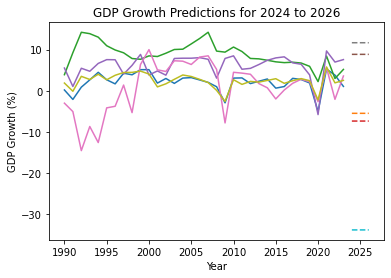

In [42]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define years and GDP growth data (annual %)
years = torch.tensor(np.arange(1990, 2024), dtype=torch.float32).view(-1, 1)
gdp_growth_data = torch.tensor([
    [0.2029478627489, -2.09105517930676, 0.89046625458775, 2.65770688317689, 4.49404924349821, 2.68232830305229, 1.68896120754063, 4.28016686255228, 3.89288652990767, 5.14100348008584, 5.13853918593026, 1.87509813216803, 2.9992553495694, 1.80638513484521, 3.09236383456562, 3.21045435651203, 2.6379438004107, 2.04990461109004, 0.995406309993598, -2.91508623949733, 3.09080637403602, 3.13719438973661, 1.75566132540601, 2.32581357393478, 2.87346677184995, 0.649970993709132, 1.03855093491798, 3.03383490260789, 2.74296343112555, 1.9084319253883, -5.03823344128351, 5.28695689105889, 3.81986633913397, 1.06599445256434],  # Canada
    [3.92025136776577, 9.26278608517291, 14.2245295924965, 13.8837293017729, 13.0368066326745, 10.9539543419, 9.92255675282291, 9.23677989187537, 7.84595178729862, 7.6616515004031, 8.49009340597647, 8.33573347817196, 9.13363078966614, 10.0380304810393, 10.1136213776263, 11.3945918098927, 12.7209556654032, 14.2308609331955, 9.65067891939361, 9.39872563259674, 10.6358710644913, 9.55083217877568, 7.86373644862111, 7.76615009773009, 7.42576365632412, 7.04132887873656, 6.84876220495761, 6.94720079331685, 6.7497738324959, 5.95050075367413, 2.23863835634639, 8.44846941687277, 2.98908408613474, 5.19999999987174],  # China
    [5.53345456125301, 1.05683143496063, 5.48239602040357, 4.75077621776924, 6.65892407028434, 7.57449183788519, 7.54952224920051, 4.04982084998183, 6.18441582172117, 8.84575555939531, 3.84099115659129, 4.82396626555771, 3.80397532112175, 7.8603814759073, 7.92293661199932, 7.92343062148318, 8.06073257166651, 7.6608150670107, 3.08669805921981, 7.86188883286074, 8.49758470221235, 5.24131619938926, 5.45638755164701, 6.38610640092348, 7.41022760516408, 7.99625378566586, 8.25630550178155, 6.79538341898569, 6.4538513449766, 3.87143694070957, -5.77772470687434, 9.68959249191211, 6.98703932576051, 7.58397112433558],  # India
    [-2.99999564243126, -5.04693945142462, -14.5310737729264, -8.66854034260423, -12.5697559802151, -4.1435284052602, -3.7550694383594, 1.3999158052963, -5.2999616266239, 6.39991469144101, 10.0000668136515, 5.10005122572568, 4.69999190914258, 7.29995234528189, 7.19994786954857, 6.39996544799469, 8.20006825456321, 8.49997776916511, 5.19996926404957, -7.79999391271275, 4.49999999920672, 4.30002918567749, 4.02408615746921, 1.75542214874298, 0.736267221765672, -1.97271922580408, 0.193690071260534, 1.82579006401834, 2.80724541059601, 2.19807571335009, -2.65365450102773, 5.61429037578345, -2.06971152527731, 3.60000000000001],  # Russia
    [1.8859655853434, -0.108312888962658, 3.52249718409405, 2.75179586183873, 4.02902272904724, 2.68443073540719, 3.7727726858688, 4.44712794186451, 4.48313334577439, 4.78842505322162, 4.07758575804293, 0.955538346430316, 1.70044732363073, 2.795605965883, 3.84777169205226, 3.483549937943, 2.78453963938148, 2.00385829825838, 0.113587248258867, -2.57650023426996, 2.6951925838264, 1.56440685438301, 2.28911338767897, 2.11783009919846, 2.52381981441982, 2.94555045455233, 1.81945147474293, 2.45762230356996, 2.96650507100425, 2.46703756313913, -2.21346933290643, 5.8002061284573, 1.93549589483209, 2.54270029878489]  # United States
], dtype=torch.float32).t()

# Normalize data
gdp_data_min = gdp_growth_data.min()
gdp_data_max = gdp_growth_data.max()
gdp_growth_normalized = (gdp_growth_data - gdp_data_min) / (gdp_data_max - gdp_data_min)

# Initialize model parameters
num_countries = gdp_growth_data.size(1)
params = torch.nn.Parameter(torch.randn(1, num_countries) * 0.01)  # Adjusted for num_countries
intercepts = torch.nn.Parameter(torch.zeros(1, num_countries))

# Define model and loss
def linear_model(x, params, intercepts):
    return x @ params + intercepts

def mse_loss(pred, target):
    return ((pred - target) ** 2).mean()

# Training parameters
learning_rate = 0.001
epochs = 1000000

for epoch in range(epochs):
    # Zero gradients
    params.grad = None
    intercepts.grad = None
    
    # Forward pass
    predicted_gdp = linear_model(years, params, intercepts)
    loss = mse_loss(predicted_gdp, gdp_growth_normalized)
    
    # Backward pass and optimization
    loss.backward()
    with torch.no_grad():
        params.grad.data.clamp_(-1, 1)
        intercepts.grad.data.clamp_(-1, 1)
        params -= learning_rate * params.grad
        intercepts -= learning_rate * intercepts.grad
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

print("Trained Parameters (slope):", params)
print("Trained Intercepts:", intercepts)

# Predict future GDP growth
future_years = torch.tensor(np.arange(2024, 2027), dtype=torch.float32).view(-1, 1)
future_years_normalized = (future_years - years.min()) / (years.max() - years.min())
future_gdp_growth_predictions = linear_model(future_years_normalized, params, intercepts)

# Denormalize predictions
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions * (gdp_data_max - gdp_data_min) + gdp_data_min

# Ensure tensor is correctly shaped
future_gdp_growth_predictions_denorm = future_gdp_growth_predictions_denorm.detach().numpy()
print("Future GDP Growth Predictions (Denormalized):\n", future_gdp_growth_predictions_denorm)

# Plot results
for i, country in enumerate(['Canada', 'China', 'India', 'Russia', 'United States']):
    plt.plot(years.numpy(), gdp_growth_data[:, i].detach().numpy(), label=f'{country} Historical')
    plt.plot(future_years.numpy(), future_gdp_growth_predictions_denorm[:, i], linestyle='--', label=f'{country} Predicted')

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth Predictions for 2024 to 2026')
# plt.legend()
plt.show()
